# Backpropagation and Multilayer Neural Networks

### Goals: 
- Intro: train a neural network with high level framework `Keras`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [2]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

Text(0.5,1,'image label: 3')

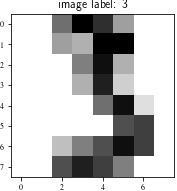

In [3]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index])

### Preprocessing

- normalization
- train/test split

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

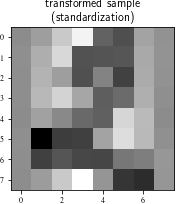

In [8]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape((8, 8)),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

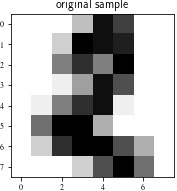

In [9]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [11]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [12]:
from tensorflow.contrib import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

/opt/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
  32/1527 [..............................] - ETA: 3s - loss: 2.7475 - acc: 0.0000e+00

1024/1527 [===================>..........] - ETA: 0s - loss: 1.0212 - acc: 0.7100    

1527/1527 [==============================] - 0s 97us/step - loss: 0.8389 - acc: 0.7734


Epoch 2/15
  32/1527 [..............................] - ETA: 0s - loss: 0.2008 - acc: 1.0000



 992/1527 [==================>...........] - ETA: 0s - loss: 0.2932 - acc: 0.9466

1527/1527 [==============================] - 0s 50us/step - loss: 0.2787 - acc: 0.9489


Epoch 3/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1325 - acc: 1.0000

1152/1527 [=====================>........] - ETA: 0s - loss: 0.1967 - acc: 0.9670

1527/1527 [==============================] - 0s 45us/step - loss: 0.1887 - acc: 0.9673


Epoch 4/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1141 - acc: 1.0000

1088/1527 [====================>.........] - ETA: 0s - loss: 0.1427 - acc: 0.9779

1527/1527 [==============================] - 0s 46us/step - loss: 0.1458 - acc: 0.9764


Epoch 5/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0777 - acc: 1.0000

1024/1527 [===================>..........] - ETA: 0s - loss: 0.1150 - acc: 0.9844

1527/1527 [==============================] - 0s 47us/step - loss: 0.1210 - acc: 0.9810


Epoch 6/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0643 - acc: 1.0000

 896/1527 [================>.............] - ETA: 0s - loss: 0.1089 - acc: 0.9833

1527/1527 [==============================] - 0s 53us/step - loss: 0.1038 - acc: 0.9843


Epoch 7/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0785 - acc: 1.0000

 896/1527 [================>.............] - ETA: 0s - loss: 0.0964 - acc: 0.9877

1527/1527 [==============================] - 0s 51us/step - loss: 0.0904 - acc: 0.9882


Epoch 8/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0701 - acc: 1.0000

 832/1527 [===============>..............] - ETA: 0s - loss: 0.0832 - acc: 0.9916

1527/1527 [==============================] - 0s 53us/step - loss: 0.0806 - acc: 0.9902


Epoch 9/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1090 - acc: 1.0000

1088/1527 [====================>.........] - ETA: 0s - loss: 0.0717 - acc: 0.9908

1527/1527 [==============================] - 0s 46us/step - loss: 0.0720 - acc: 0.9902


Epoch 10/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1349 - acc: 0.9688

 864/1527 [===============>..............] - ETA: 0s - loss: 0.0632 - acc: 0.9931

1527/1527 [==============================] - 0s 52us/step - loss: 0.0656 - acc: 0.9921


Epoch 11/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0507 - acc: 1.0000

 864/1527 [===============>..............] - ETA: 0s - loss: 0.0591 - acc: 0.9931

1527/1527 [==============================] - 0s 50us/step - loss: 0.0601 - acc: 0.9928


Epoch 12/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0542 - acc: 1.0000

 992/1527 [==================>...........] - ETA: 0s - loss: 0.0565 - acc: 0.9909

1527/1527 [==============================] - 0s 47us/step - loss: 0.0552 - acc: 0.9928


Epoch 13/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0145 - acc: 1.0000

 864/1527 [===============>..............] - ETA: 0s - loss: 0.0517 - acc: 0.9919

1527/1527 [==============================] - 0s 56us/step - loss: 0.0512 - acc: 0.9935


Epoch 14/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0460 - acc: 1.0000

 928/1527 [=================>............] - ETA: 0s - loss: 0.0493 - acc: 0.9935

1527/1527 [==============================] - 0s 53us/step - loss: 0.0476 - acc: 0.9941


Epoch 15/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0509 - acc: 1.0000

 608/1527 [==========>...................] - ETA: 0s - loss: 0.0416 - acc: 0.9984

1527/1527 [==============================] - 0s 64us/step - loss: 0.0441 - acc: 0.9948


### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is avaiable at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
  32/1527 [..............................] - ETA: 8s - loss: 2.2551 - acc: 0.1250

 864/1527 [===============>..............] - ETA: 0s - loss: 2.0216 - acc: 0.2454

1527/1527 [==============================] - 0s 181us/step - loss: 1.8571 - acc: 0.3477


Epoch 2/15
  32/1527 [..............................] - ETA: 0s - loss: 1.4961 - acc: 0.5000

 512/1527 [=========>....................] - ETA: 0s - loss: 1.3452 - acc: 0.6270

1152/1527 [=====================>........] - ETA: 0s - loss: 1.2427 - acc: 0.6562

1472/1527 [===========================>..] - ETA: 0s - loss: 1.1696 - acc: 0.6895

1527/1527 [==============================] - 0s 108us/step - loss: 1.1637 - acc: 0.6909


Epoch 3/15
  32/1527 [..............................] - ETA: 0s - loss: 0.7177 - acc: 0.8438

 352/1527 [=====>........................] - ETA: 0s - loss: 0.8037 - acc: 0.8153

1024/1527 [===================>..........] - ETA: 0s - loss: 0.7128 - acc: 0.8428

1527/1527 [==============================] - 0s 98us/step - loss: 0.6631 - acc: 0.8507


Epoch 4/15
  32/1527 [..............................] - ETA: 0s - loss: 0.5473 - acc: 0.8750

 480/1527 [========>.....................] - ETA: 0s - loss: 0.4247 - acc: 0.9271

1248/1527 [=======================>......] - ETA: 0s - loss: 0.3953 - acc: 0.9247

1527/1527 [==============================] - 0s 87us/step - loss: 0.3793 - acc: 0.9286


Epoch 5/15
  32/1527 [..............................] - ETA: 0s - loss: 0.2152 - acc: 0.9688

 640/1527 [===========>..................] - ETA: 0s - loss: 0.2534 - acc: 0.9578

1376/1527 [==========================>...] - ETA: 0s - loss: 0.2384 - acc: 0.9600

1527/1527 [==============================] - 0s 78us/step - loss: 0.2408 - acc: 0.9574


Epoch 6/15
  32/1527 [..............................] - ETA: 0s - loss: 0.2004 - acc: 0.9688

 800/1527 [==============>...............] - ETA: 0s - loss: 0.1769 - acc: 0.9750

1527/1527 [==============================] - 0s 67us/step - loss: 0.1695 - acc: 0.9745


Epoch 7/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1465 - acc: 1.0000

 704/1527 [============>.................] - ETA: 0s - loss: 0.1308 - acc: 0.9830

1527/1527 [==============================] - 0s 71us/step - loss: 0.1270 - acc: 0.9817


Epoch 8/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0648 - acc: 1.0000

 640/1527 [===========>..................] - ETA: 0s - loss: 0.0965 - acc: 0.9859

1376/1527 [==========================>...] - ETA: 0s - loss: 0.1013 - acc: 0.9855

1527/1527 [==============================] - 0s 76us/step - loss: 0.0980 - acc: 0.9862


Epoch 9/15
  32/1527 [..............................] - ETA: 0s - loss: 0.1017 - acc: 0.9688

 992/1527 [==================>...........] - ETA: 0s - loss: 0.0820 - acc: 0.9909

1527/1527 [==============================] - 0s 66us/step - loss: 0.0773 - acc: 0.9908


Epoch 10/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0376 - acc: 1.0000

 736/1527 [=============>................] - ETA: 0s - loss: 0.0556 - acc: 0.9959

1527/1527 [==============================] - 0s 63us/step - loss: 0.0635 - acc: 0.9935


Epoch 11/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0487 - acc: 1.0000

 800/1527 [==============>...............] - ETA: 0s - loss: 0.0572 - acc: 0.9912



1440/1527 [===========================>..] - ETA: 0s - loss: 0.0516 - acc: 0.9951

1527/1527 [==============================] - 0s 75us/step - loss: 0.0519 - acc: 0.9954


Epoch 12/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0245 - acc: 1.0000

 416/1527 [=======>......................] - ETA: 0s - loss: 0.0497 - acc: 0.9952

1344/1527 [=========================>....] - ETA: 0s - loss: 0.0432 - acc: 0.9955

1527/1527 [==============================] - 0s 80us/step - loss: 0.0439 - acc: 0.9961


Epoch 13/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0388 - acc: 1.0000

 672/1527 [============>.................] - ETA: 0s - loss: 0.0309 - acc: 0.9970

1216/1527 [======================>.......] - ETA: 0s - loss: 0.0364 - acc: 0.9975

1527/1527 [==============================] - 0s 84us/step - loss: 0.0362 - acc: 0.9980


Epoch 14/15


  32/1527 [..............................] - ETA: 0s - loss: 0.0232 - acc: 1.0000

 704/1527 [============>.................] - ETA: 0s - loss: 0.0286 - acc: 0.9972

1088/1527 [====================>.........] - ETA: 0s - loss: 0.0291 - acc: 0.9982

1527/1527 [==============================] - 0s 103us/step - loss: 0.0310 - acc: 0.9974


Epoch 15/15
  32/1527 [..............................] - ETA: 0s - loss: 0.0467 - acc: 1.0000

 576/1527 [==========>...................] - ETA: 0s - loss: 0.0269 - acc: 1.0000

1312/1527 [========================>.....] - ETA: 0s - loss: 0.0257 - acc: 0.9992

1527/1527 [==============================] - 0s 79us/step - loss: 0.0263 - acc: 0.9993


In [14]:
# %load solutions/keras_sgd_and_momentum.py

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [ ]:
# %load solutions/keras_adam_and_adadelta.py

### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

In [19]:
y_pred = model.predict_classes(X_test)
match = y_pred == y_test
print('Accuracy %.3f' % np.mean(match))

Accuracy 0.978


In [ ]:
# %load solutions/keras_accuracy_on_test_set.py

- Compute the conditional probabilities of sample number 42 of the test set with `model.predict_proba(...)`
- Derive the loss (negative log likelihood of that sample) using numpy operations
- Compute the average negative log likelihood of the test set.
- Compare this value to the training loss reported by keras: is the model overfitting or underfitting?

Note: you might need to retrain the model with a larger number of epochs (e.g. 50) to ensure that it has fully converged.

In [35]:
proba = model.predict_proba(X_test[[42]])[0]
loss = - np.log(proba)[y_test[42]]
print(loss)
# Overfitting !

0.0029631006


In [ ]:
# %load solutions/keras_loss_on_test_set.py

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [44]:
from keras import initializers

normal_init = initializers.RandomNormal(stddev=0.0001)
normal_init = initializers.Constant(0)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(lr=1),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

Epoch 1/10


  32/1527 [..............................] - ETA: 18s - loss: 2.3026 - acc: 0.1250

 544/1527 [=========>....................] - ETA: 0s - loss: 2.4968 - acc: 0.1048 

1152/1527 [=====================>........] - ETA: 0s - loss: 2.4619 - acc: 0.1111

1527/1527 [==============================] - 1s 349us/step - loss: 2.4442 - acc: 0.1061


Epoch 2/10
  32/1527 [..............................] - ETA: 0s - loss: 2.4542 - acc: 0.0938

 608/1527 [==========>...................] - ETA: 0s - loss: 2.3851 - acc: 0.0822

1527/1527 [==============================] - 0s 67us/step - loss: 2.4077 - acc: 0.0910


Epoch 3/10
  32/1527 [..............................] - ETA: 0s - loss: 2.4361 - acc: 0.0625

 640/1527 [===========>..................] - ETA: 0s - loss: 2.4352 - acc: 0.1219

1527/1527 [==============================] - 0s 69us/step - loss: 2.4081 - acc: 0.1126


Epoch 4/10
  32/1527 [..............................] - ETA: 0s - loss: 2.3784 - acc: 0.1250

 608/1527 [==========>...................] - ETA: 0s - loss: 2.4020 - acc: 0.0822

1527/1527 [==============================] - 0s 67us/step - loss: 2.3962 - acc: 0.0923


Epoch 5/10
  32/1527 [..............................] - ETA: 0s - loss: 2.3890 - acc: 0.0312

 704/1527 [============>.................] - ETA: 0s - loss: 2.3567 - acc: 0.1037

1440/1527 [===========================>..] - ETA: 0s - loss: 2.3686 - acc: 0.0986

1527/1527 [==============================] - 0s 76us/step - loss: 2.3680 - acc: 0.0982


Epoch 6/10
  32/1527 [..............................] - ETA: 0s - loss: 2.5740 - acc: 0.0312

 896/1527 [================>.............] - ETA: 0s - loss: 2.4551 - acc: 0.0926

1527/1527 [==============================] - 0s 70us/step - loss: 2.4405 - acc: 0.0956


Epoch 7/10
  32/1527 [..............................] - ETA: 0s - loss: 2.4340 - acc: 0.0625

 576/1527 [==========>...................] - ETA: 0s - loss: 2.3931 - acc: 0.0799

1216/1527 [======================>.......] - ETA: 0s - loss: 2.4207 - acc: 0.0880

1527/1527 [==============================] - 0s 85us/step - loss: 2.4249 - acc: 0.0956


Epoch 8/10
  32/1527 [..............................] - ETA: 0s - loss: 2.3276 - acc: 0.1250

 736/1527 [=============>................] - ETA: 0s - loss: 2.4353 - acc: 0.0924

1527/1527 [==============================] - 0s 69us/step - loss: 2.3966 - acc: 0.0976


Epoch 9/10
  32/1527 [..............................] - ETA: 0s - loss: 2.3936 - acc: 0.0625

 736/1527 [=============>................] - ETA: 0s - loss: 2.4220 - acc: 0.1087

1527/1527 [==============================] - 0s 69us/step - loss: 2.4161 - acc: 0.1100


Epoch 10/10
  32/1527 [..............................] - ETA: 0s - loss: 2.5421 - acc: 0.0312

 544/1527 [=========>....................] - ETA: 0s - loss: 2.4701 - acc: 0.0827

1376/1527 [==========================>...] - ETA: 0s - loss: 2.4506 - acc: 0.0938

1527/1527 [==============================] - 0s 77us/step - loss: 2.4426 - acc: 0.0956


#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

In [ ]:
# %load solutions/keras_initializations.py

In [ ]:
# %load solutions/keras_initializations_analysis.py